# Data Visualization with Matplotlib_Game of Thrones

### battles.csv
 - name: String variable. The name of the battle.
 - year: Numeric variable. The year of the battle.
 - battle_number: Numeric variable. A unique ID number for the battle.
 - attacker_king: Categorical. The attacker's king. A slash indicators that the king charges over the course of the war. For example, "Joffrey/Tommen Baratheon" is coded as such because one king follows the other in the Iron Throne.
 - defender_king: Categorical variable. The defender's king.
 - attacker_1: String variable. Major house attacking.
 - attacker_2: String variable. Major house attacking.
 - attacker_3: String variable. Major house attacking.
 - attacker_4: String variable. Major house attacking.
 - defender_1: String variable. Major house defending.
 - defender_2: String variable. Major house defending.
 - defender_3: String variable. Major house defending.
 - defender_4: String variable. Major house defending.
 - attacker_outcome: Categorical variable. The outcome from the perspective of the attacker. Categories: win, loss, draw.
 - battle_type: Categorical variable. A classification of the battle's primary type. Categories: pitched_battle: Armies meet in a location and fight. This is also the baseline category. ambush: A battle where stealth or subterfuge was the primary means of attack. siege: A prolonged of a fortied position. razing: An attack against an undefended position
 - major_death: Binary variable. If there was a death of a major figure during the battle.
 - major_capture: Binary variable. If there was the capture of the major figure during the battle.
 - attacker_size: Numeric variable. The size of the attacker's force. No distinction is made between the types of soldiers such as cavalry and footmen.
 - defender_size: Numeric variable. The size of the defenders's force. No distinction is made between the types of soldiers such as cavalry and footmen.
 - attacker_commander: String variable. Major commanders of the attackers. Commander's names are included without honoric titles and commandders are seperated by commas.
 - defender_commander: String variable. Major commanders of the defener. Commander's names are included without honoric titles and commandders are seperated by commas.
 - summer: Binary variable. Was it summer?
 - location: String variable. The location of the battle.
 - region: Categorical variable. The region where the battle takes place. Categories: Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne
 - note: String variable. Coding notes regarding individual observations.

### character-deaths.csv

 - Name: character name
 - Allegiances: character house
 - Death Year: year character died
 - Book of Death: book character died in
 - Death Chapter: chapter character died in
 - Book Intro Chapter: chapter character was introduced in
 - Gender: 1 is male, 0 is female
 - Nobility: 1 is nobel, 0 is a commoner
 - GoT: Appeared in first book
 - CoK: Appeared in second book
 - SoS: Appeared in third book
 - FfC: Appeared in fourth book
 - DwD: Appeared in fifth book

In [1]:
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [3]:
battles = pd.read_csv("matplotlib/battles.csv", sep=",")
deaths = pd.read_csv("matplotlib/character-deaths.csv", sep=",")

In [7]:
battles.shape

(38, 25)

In [8]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [5]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [9]:
deaths.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [10]:
deaths.shape

(917, 13)

In [6]:
deaths.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


## 작품 번호에 따른 인물들의 죽음 횟수 시각화하기 - 라인 플롯

In [11]:
book_nums_to_death_count = deaths["Book of Death"].value_counts().sort_index()
book_nums_to_death_count

1.0    49
2.0    73
3.0    97
4.0    27
5.0    61
Name: Book of Death, dtype: int64

<IPython.core.display.Javascript object>


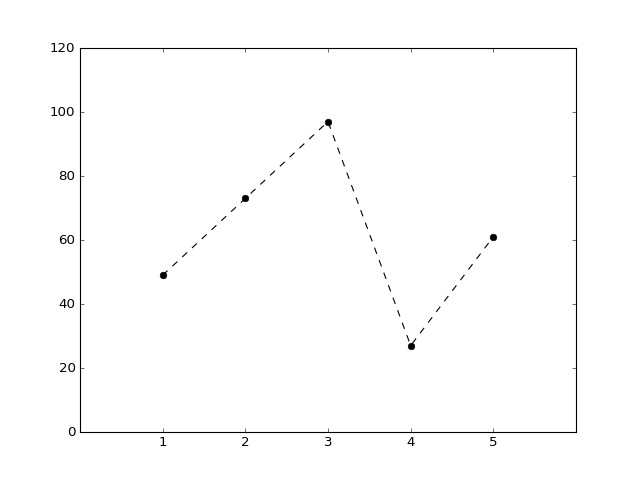

(0, 120)

In [12]:
ax1 = book_nums_to_death_count.plot(color="k", marker="o", linestyle="--")
ax1.set_xticks(np.arange(1, 6))
ax1.set_xlim([0, 6])
ax1.set_ylim([0, 120])

## 대규모 전투 상에서 공격군과 수비군 간의 병력 차이 시각화하기 - 박스 플롯

In [14]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


 - attacker_size	defender_size 두개의 컬럼 사용.

In [15]:
battles = battles.set_index(["name"])

In [17]:
battles.head()

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [18]:
large_battles_mask = battles["attacker_size"] + battles["defender_size"] > 10000
large_battles = battles.loc[large_battles_mask, ["attacker_size", "defender_size"]]

In [22]:
large_battles_mask

name
Battle of the Golden Tooth                               True
Battle at the Mummer's Ford                             False
Battle of Riverrun                                       True
Battle of the Green Fork                                 True
Battle of the Whispering Wood                           False
Battle of the Camps                                      True
Sack of Darry                                           False
Battle of Moat Cailin                                   False
Battle of Deepwood Motte                                False
Battle of the Stony Shore                               False
Battle of Torrhen's Square                              False
Battle of Winterfell                                    False
Sack of Torrhen's Square                                False
Sack of Winterfell                                      False
Battle of Oxcross                                        True
Siege of Storm's End                                     True
Bat

In [20]:
large_battles.head(3)

,attacker_size,defender_size
name,,
Battle of the Golden Tooth,15000.0,4000.0
Battle of Riverrun,15000.0,10000.0
Battle of the Green Fork,18000.0,20000.0


<IPython.core.display.Javascript object>


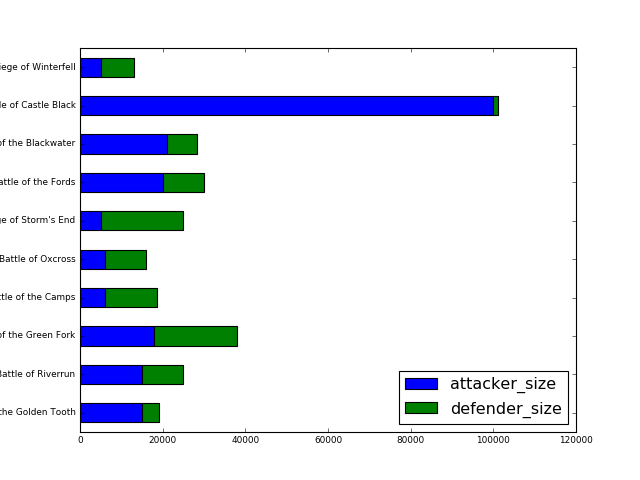

In [21]:
ax2 = large_battles.plot(kind="barh", stacked=True, fontsize=8)

In [24]:
large_battles["attacker_pcts"] = large_battles["attacker_size"] / (large_battles["attacker_size"] + large_battles["defender_size"])

In [25]:
large_battles["defender_pcts"] = large_battles["defender_size"] / (large_battles["attacker_size"] + large_battles["defender_size"])

In [26]:
large_battles.head()

,attacker_size,defender_size,attacker_pcts,defender_pcts
name,,,,
Battle of the Golden Tooth,15000.0,4000.0,0.789474,0.210526
Battle of Riverrun,15000.0,10000.0,0.600000,0.400000
Battle of the Green Fork,18000.0,20000.0,0.473684,0.526316
Battle of the Camps,6000.0,12625.0,0.322148,0.677852
Battle of Oxcross,6000.0,10000.0,0.375000,0.625000


<IPython.core.display.Javascript object>


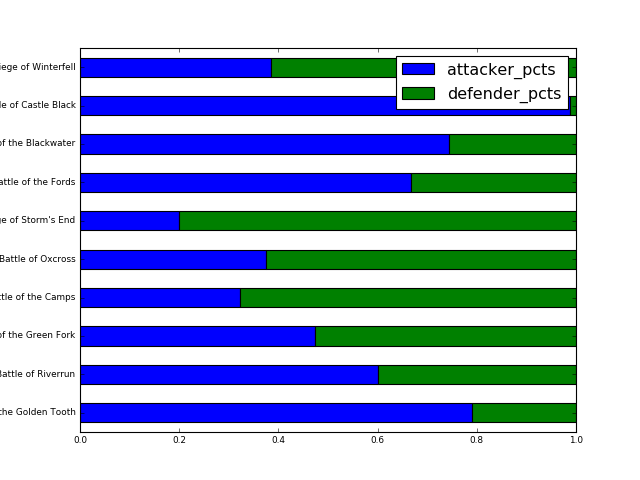

In [27]:
ax3 = large_battles[["attacker_pcts", "defender_pcts"]].plot(kind="barh", stacked=True, fontsize=8)

## 전체 전투 중 각 가문의 개입 빈도 시각화하기 - 히스토그램

In [29]:
col_names = battles.columns[4:12]
col_names # 공수 가문

Index(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4'],
      dtype='object')

In [31]:
house_names = battles[col_names].fillna("None").values
house_names[:5]

array([['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Baratheon', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Stark', 'None', 'None', 'None', 'Lannister', 'None', 'None',
        'None'],
       ['Stark', 'Tully', 'None', 'None', 'Lannister', 'None', 'None',
        'None']], dtype=object)

In [32]:
house_names = np.unique(house_names)
house_names = house_names[house_names != "None"]
house_names[:5]

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions'], dtype=object)

In [33]:
houses_to_battle_counts = pd.Series(0, index=house_names)
houses_to_battle_counts

Baratheon                      0
Blackwood                      0
Bolton                         0
Bracken                        0
Brave Companions               0
Brotherhood without Banners    0
Darry                          0
Free folk                      0
Frey                           0
Giants                         0
Glover                         0
Greyjoy                        0
Karstark                       0
Lannister                      0
Mallister                      0
Mormont                        0
Night's Watch                  0
Stark                          0
Thenns                         0
Tully                          0
Tyrell                         0
dtype: int64

In [36]:
for col in col_names:
    print(battles[col].value_counts())

Lannister                      8
Stark                          8
Greyjoy                        7
Baratheon                      6
Frey                           2
Bolton                         2
Brave Companions               1
Darry                          1
Free folk                      1
Bracken                        1
Brotherhood without Banners    1
Name: attacker_1, dtype: int64
Tully        3
Karstark     2
Lannister    1
Thenns       1
Greyjoy      1
Frey         1
Bolton       1
Name: attacker_2, dtype: int64
Mormont    2
Giants     1
Name: attacker_3, dtype: int64
Glover    2
Name: attacker_4, dtype: int64
Lannister           9
Stark               8
Baratheon           4
Tully               4
Greyjoy             3
Brave Companions    2
Tyrell              2
Darry               1
Night's Watch       1
Blackwood           1
Bolton              1
Mallister           1
Name: defender_1, dtype: int64
Baratheon    1
Frey         1
Name: defender_2, dtype: int64
Series([], Nam

In [37]:
for col in col_names:
    houses_to_battle_counts = houses_to_battle_counts.add(battles[col].value_counts(), fill_value=0)
# 현재 열만의 데이터를 더하는데 그 값중에 NaN이 있을경우 fill_value = 0 0으로 치환하여 더해라.

In [38]:
houses_to_battle_counts

Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

<IPython.core.display.Javascript object>


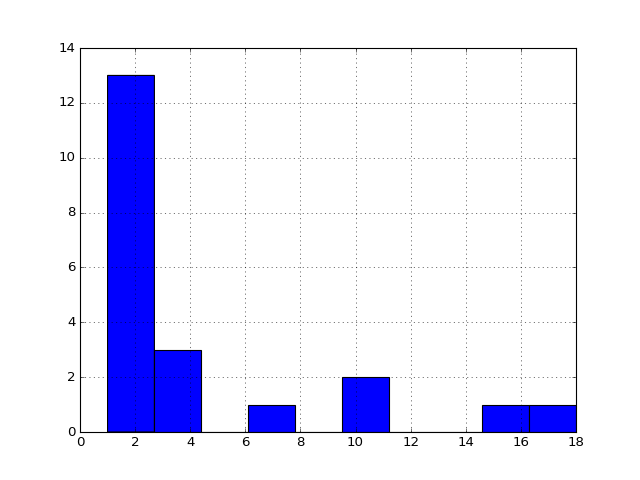

In [39]:
ax4 = houses_to_battle_counts.hist(bins=10)